<a href="https://colab.research.google.com/github/Sweta-Das/TensorFlow-Python-Projects/blob/Fundamentals/fcc_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

# Linear Regression

- one of the most basic forms of ML i.e. used to predict numeric values
- follows a simple concept that if data points are related linearly, then we can generate a line of best fit for these points and use it to predict future values.

<br>

Ref: [Linear Regression](https://www.tensorflow.org/tutorials/estimator/linear)

## Simple Example

(0.0, 6.0, 0.0, 20.0)

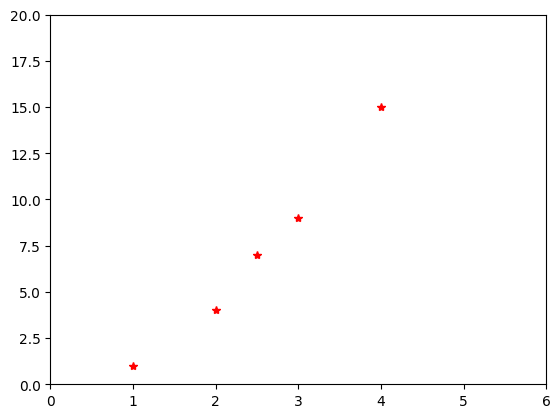

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'r*')
plt.axis([0, 6, 0, 20])

We can view a linear correspondence in the above figure i.e., if the value of x increases, so does the y. This relation allows us to create a line of best fit for this dataset. <br>

"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points." (https://www.investopedia.com/terms/l/line-of-best-fit.asp)
<br>

The equation of line in 2D: <br>
y=mx + b

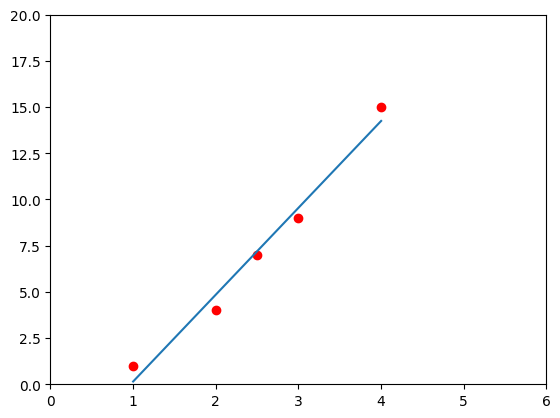

In [4]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

## Linear Regression in Titanic Dataset

In [5]:
!pip install -q scikit-learn

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

### 1. Loading Dataset

In [12]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftest = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dftest.pop('survived')

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [13]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [15]:
dftrain.shape

(627, 9)

It means that we have 627 entries (rows) and 9 features (columns).

In [10]:
dftest.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [14]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

### 2. Understanding Dataset

<Axes: >

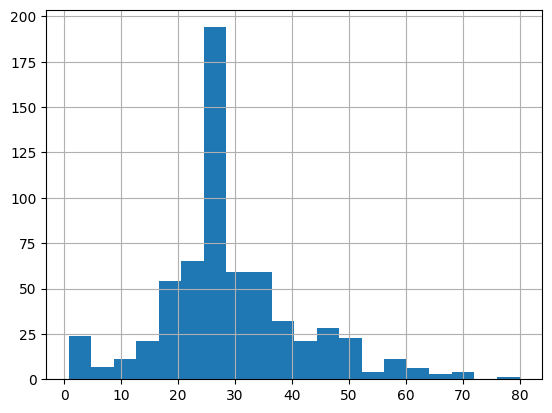

In [16]:
dftrain.age.hist(bins=20)

<Axes: xlabel='sex'>

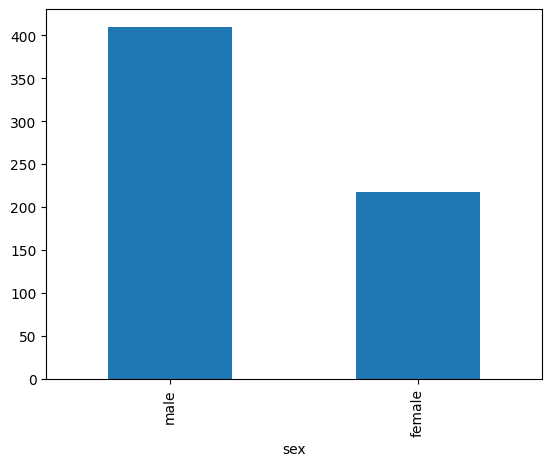

In [19]:
dftrain.sex.value_counts().plot(kind='bar')

<Axes: xlabel='class'>

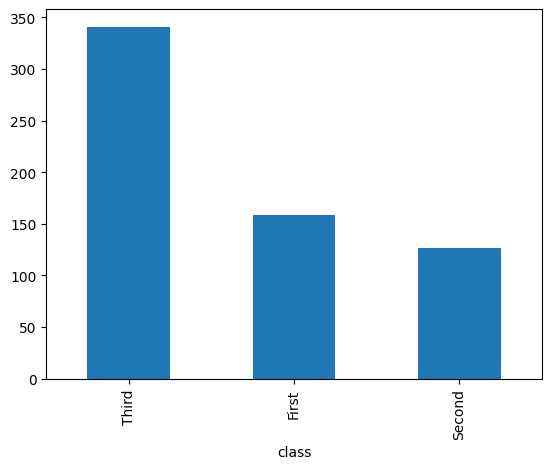

In [20]:
dftrain['class'].value_counts().plot(kind='bar')

Text(0.5, 0, '% survive')

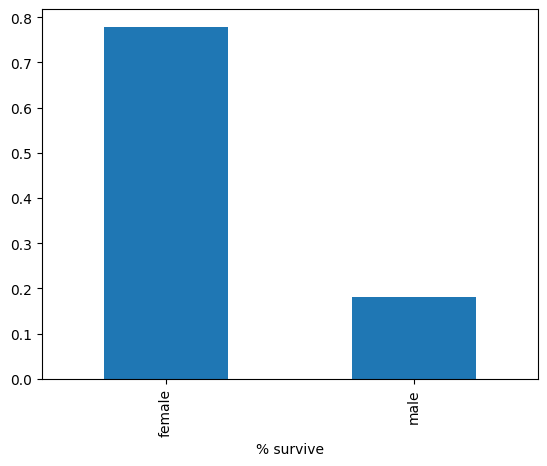

In [21]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='bar').set_xlabel('% survive')

**Informations**
- Majority of passengers are within the age of 20-30 years.
- Majority of passengers are male.
- Majority of passengers belong to "Third" class.
- Based on survival rate, females have higher chance than male.

### 3. Training Dataset

In [22]:
# Training dataset
print(dftrain.shape)
# Testing dataset
print(dftest.shape)

(627, 9)
(264, 9)


**(i) DATASET PREPROCESSING**

In [23]:
# Dividing categorical and numerical columns from the dataset
cat_cols = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
num_cols = ['age', 'fare']

In [27]:
# Making a list of categorical and numerical columns with their unique values
feat_cols = []
for feature_name in cat_cols:
  # Getting a list of unique values from the given feature column
  vocab = dftrain[feature_name].unique()
  feat_cols.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))

for feature_name in num_cols:
  feat_cols.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feat_cols)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def